<a href="https://colab.research.google.com/github/susanquiros/Project-4--Group-6/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files
uploaded = files.upload()

Saving winequalityN_withname.csv to winequalityN_withname.csv


In [66]:
#importing the energy csv
import pandas as pd
wine_df = pd.read_csv('winequalityN_withname.csv',encoding='latin-1',header=0)
wine_df.head()

type  fixed acidity  volatile acidity  ...  alcohol  quality  .winename
0  white            7.0              0.27  ...      8.8        6  .Beb 2009
1  white            6.3              0.30  ...      9.5        6  .Beb 2010
2  white            8.1              0.28  ...     10.1        6  .Beb 2011
3  white            7.2              0.23  ...      9.9        6  .Beb 2012
4  white            7.2              0.23  ...      9.9        6  .Beb 2013

[5 rows x 14 columns]

In [67]:
wine_df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
.winename                object
dtype: object

In [68]:
wine_clean= wine_df.dropna()
wine_clean

type  fixed acidity  volatile acidity  ...  alcohol  quality       .winename
0     white            7.0             0.270  ...      8.8        6       .Beb 2009
1     white            6.3             0.300  ...      9.5        6       .Beb 2010
2     white            8.1             0.280  ...     10.1        6       .Beb 2011
3     white            7.2             0.230  ...      9.9        6       .Beb 2012
4     white            7.2             0.230  ...      9.9        6       .Beb 2013
...     ...            ...               ...  ...      ...      ...             ...
6491    red            6.8             0.620  ...      9.5        6   Bonefant 2004
6492    red            6.2             0.600  ...     10.5        5   Bonefant 2006
6494    red            6.3             0.510  ...     11.0        6  Bons Ares 2003
6495    red            5.9             0.645  ...     10.2        5  Bons Ares 2008
6496    red            6.0             0.310  ...     11.0        6      Boina 2017

[6463 rows x 14 columns]

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [70]:
model = KMeans(n_clusters=5, random_state=5)

In [71]:
wine_names = wine_clean['.winename'].values
wine_clean = wine_clean.drop('.winename', axis=1)
wine_dummies= pd.get_dummies(wine_clean, drop_first=True)

In [72]:
wine_dummies.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type_white                uint8
dtype: object

In [73]:
# from sklearn import preprocessing
# from sklearn.preprocessing import LabelEncoder
# le = preprocessing.LabelEncoder()
# le.fit(wine_clean[".winename","type"])
# LabelEncoder()
# list(le.classes_)
# le.transform(wine_clean['.winename','type'])
# # array([2, 2, 1]...)
# # >>> list(le.inverse_transform([2, 2, 1]))
# # ['tokyo', 'tokyo', 'paris']

In [74]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# for i in wine_clean:
#     wine_clean[i] = label_encoder.fit_transform(wine_clean[i])

# wine_clean.head(50)

In [75]:
wine_clean.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          315
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 996
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

In [76]:
# 
model.fit(wine_dummies)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [77]:
predictions = model.predict(wine_dummies)
print(predictions)

[3 2 4 ... 0 0 0]


In [78]:
wine_clean["class"] = model.labels_
wine_clean['name'] = wine_names
wine_clean.head()

type  fixed acidity  volatile acidity  ...  quality  class       name
0  white            7.0              0.27  ...        6      3  .Beb 2009
1  white            6.3              0.30  ...        6      2  .Beb 2010
2  white            8.1              0.28  ...        6      4  .Beb 2011
3  white            7.2              0.23  ...        6      1  .Beb 2012
4  white            7.2              0.23  ...        6      1  .Beb 2013

[5 rows x 15 columns]

In [93]:
#groupoing by the class to get the average
# wine_dummies['class'] = model.labels_
# wine_dummies.groupby(by =['class']).mean()
wine_clean.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
class                     int32
name                     object
dtype: object

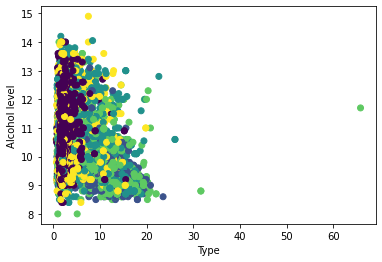

In [86]:
plt.scatter(x=wine_clean["residual sugar"], y=wine_clean['alcohol'], c=wine_clean['class'])
plt.xlabel('Type')
plt.ylabel('Alcohol level')
plt.show()

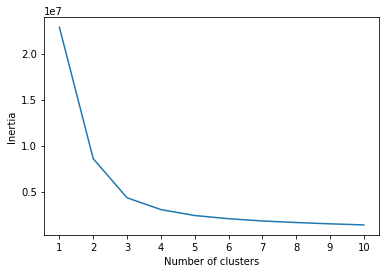

In [87]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(wine_dummies)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [90]:

from google.colab import drive
drive.mount('drive')
wine_clean.to_csv('wine_clean_clustered.csv',index=False)
!cp wine_clean_clustered.csv 'drive/My Drive'

Mounted at drive
